In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = pd.read_csv("used_device_data.csv")
data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


<AxesSubplot:xlabel='rear_camera_mp', ylabel='Density'>

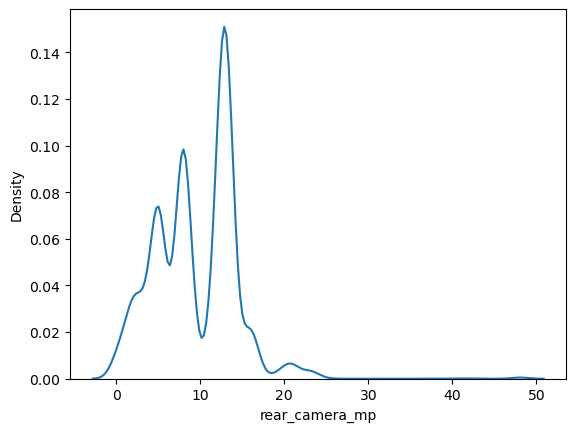

In [3]:
# Density plot of the rear camera mp
sb.kdeplot(data=data, x='rear_camera_mp')

In [4]:
# Measuring the skewness to determine if we should remove the NULL values
# Since the skew is close to 0 we can safely remove the NULL values as it is close to a normal distribution
data['rear_camera_mp'].astype(float).skew()

0.7655057967745678

In [5]:
# Finding percentage of missing values in the data
# Since the number of data that is not found is a small proportion of the total data, removing them will not significantly
# affect the accuracy of the model.
missingValues = data.isnull().sum()

rearCameraMissing = data['rear_camera_mp'].isnull().sum()
frontCameraMissing = data['front_camera_mp'].isnull().sum()
internalMemMissing = data['internal_memory'].isnull().sum()
ramMissing = data['ram'].isnull().sum()
battMissing = data['battery'].isnull().sum()
weightMissing = data['weight'].isnull().sum()

rearCamMissPercent = (rearCameraMissing/len(data['rear_camera_mp']))*100
frontCamMissPercent = (frontCameraMissing/len(data['front_camera_mp']))*100
internalMemMissPercent = (internalMemMissing/len(data['internal_memory']))*100
ramMissPercent = (ramMissing/len(data['ram']))*100
battMissPercent = (battMissing/len(data['battery']))*100
weightMissPercent = (weightMissing/len(data['weight']))*100

print("Percentage of rear camera missing: ", rearCamMissPercent, "%")
print("Percentage of front camera missing: ", frontCamMissPercent, "%")
print("Percentage of internal memory missing: ", internalMemMissPercent, "%")
print("Percentage of ram missing: ", ramMissPercent, "%")
print("Percentage of battery missing: ", battMissPercent, "%")
print("Percentage of weight missing: ", weightMissPercent, "%")

Percentage of rear camera missing:  5.182397220613781 %
Percentage of front camera missing:  0.05790387955993051 %
Percentage of internal memory missing:  0.11580775911986102 %
Percentage of ram missing:  0.11580775911986102 %
Percentage of battery missing:  0.17371163867979156 %
Percentage of weight missing:  0.2026635784597568 %


<AxesSubplot:>

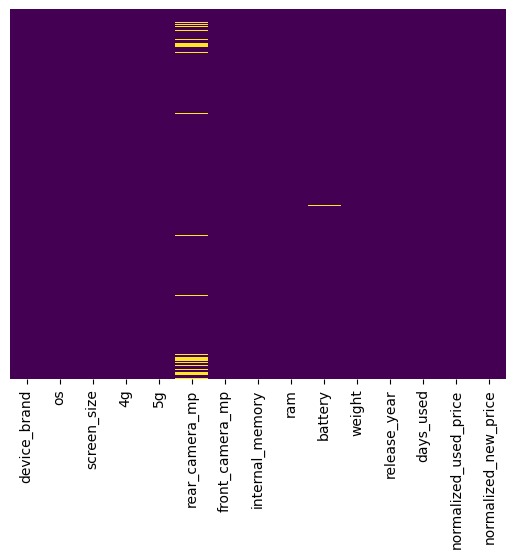

In [6]:
# Visualizing the dataset with missing data
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

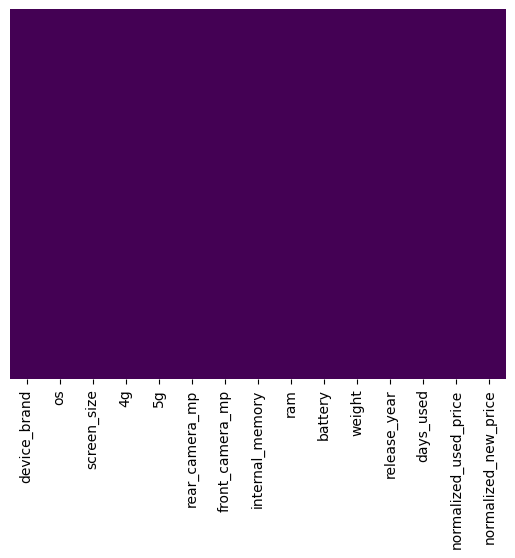

In [7]:
# Visualizing the dataset after removing the missing data
data = data.dropna()
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

In [9]:
data

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [10]:
# Encoding the categorical data into a binary form for ease of data processing
data['4g'] = data['4g'].map({'yes':1,'no':0})
data['5g'] = data['5g'].map({'yes':1,'no':0})

C:\Users\yylee\AppData\Local\Temp\ipykernel_7652\3830023341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['4g'] = data['4g'].map({'yes':1,'no':0})
C:\Users\yylee\AppData\Local\Temp\ipykernel_7652\3830023341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['5g'] = data['5g'].map({'yes':1,'no':0})


,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
